In [1]:
library(ggplot2)
library("reshape2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Store a0,a1,a5 in seperate dataframe and save them in rds file.
Note that the following plot RMSE vs n

# a1

In [2]:
# a1
Longtree_n = c(100,150,200,NA,300,400)
Longtree_rmse = (c(40.8124759073105,20.4228775780486,11.7894853042513,NA,
                 11.200079660467,9.34937924617486))^0.5

FF_n = c(100,150,200,NA,300,400)
FF_rmse = (c(47.3061432154294,37.9309988990199,35.6507306526029,
             NA,33.3158078891706, 31.9651587159878))^0.5

RF_n = c(100,NA,200,250,300,400)
RF_rmse = (c(53.4351936801034,NA,56.7393874024402,46.3128640580033,
             45.6212536643833, 44.4333624087787))^0.5

lmertree_rmse = (c(93.0393999891423,88.695633749479,76.145612952536,
68.9240909611754, 76.0292904074621, 77.2650568422657))^0.5

n_list = c(100,150,200,250,300,400)
df_a1 = data.frame("samplesize" = n_list, "FREEtree" = Longtree_rmse,
    "FuzzyForest" =FF_rmse, "RandomForest" = RF_rmse,"LMMtree" = lmertree_rmse)

In [3]:
df_a1

samplesize,FREEtree,FuzzyForest,RandomForest,LMMtree
100,6.388464,6.877946,7.309938,9.645693
150,4.519168,6.158815,NA,9.417836
200,3.433582,5.970823,7.532555,8.726145
250,NA,NA,6.805356,8.302053
300,3.346652,5.771985,6.754351,8.719478
400,3.057675,5.653774,6.665835,8.790054


In [4]:
df_a1_long <- melt(df_a1, id="samplesize")  # convert to long format
df_a1_long

samplesize,variable,value
100,FREEtree,6.388464
150,FREEtree,4.519168
200,FREEtree,3.433582
250,FREEtree,NA
300,FREEtree,3.346652
400,FREEtree,3.057675
100,FuzzyForest,6.877946
150,FuzzyForest,6.158815
200,FuzzyForest,5.970823
250,FuzzyForest,NA


In [5]:
df_a1_long[complete.cases(df_a1_long),] # does not contain NA

,samplesize,variable,value
1,100,FREEtree,6.388464
2,150,FREEtree,4.519168
3,200,FREEtree,3.433582
5,300,FREEtree,3.346652
6,400,FREEtree,3.057675
7,100,FuzzyForest,6.877946
8,150,FuzzyForest,6.158815
9,200,FuzzyForest,5.970823
11,300,FuzzyForest,5.771985
12,400,FuzzyForest,5.653774


Saving 6.67 x 6.67 in image


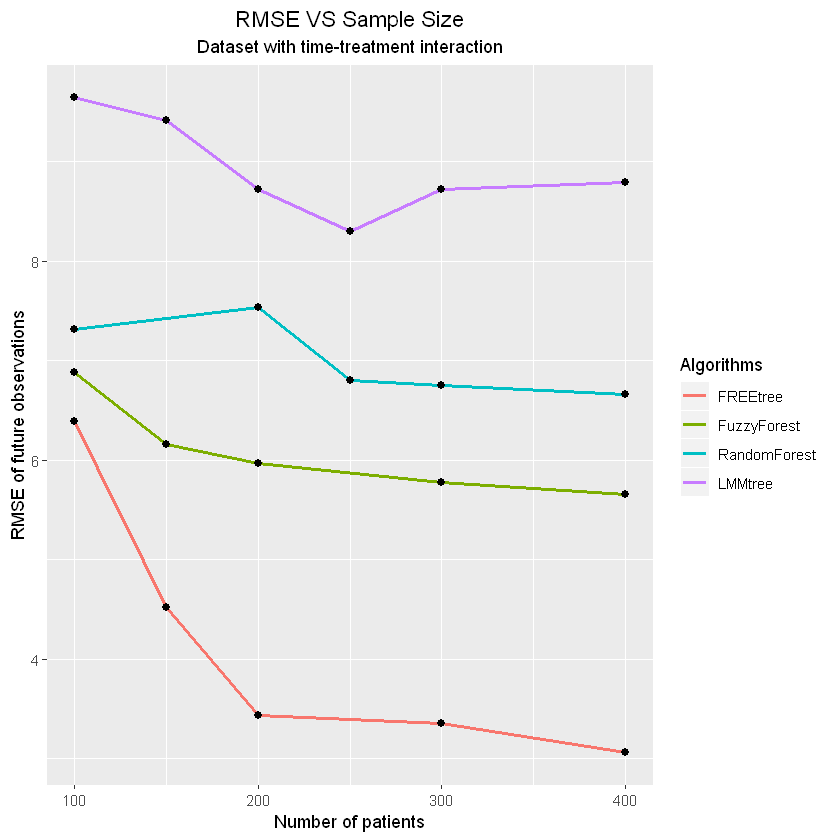

In [6]:
g = ggplot(data=df_a1_long[complete.cases(df_a1_long),] , 
       aes(x=samplesize, y=value, colour=variable)) +  
geom_line(size=1)+geom_point(size=2,colour="black") +
labs(title="RMSE VS Sample Size",
     subtitle = "Dataset with time-treatment interaction",
     y="RMSE of future observations", x="Number of patients")+
theme(plot.title = element_text(hjust = 0.5),
      plot.subtitle = element_text(hjust = 0.5))+
labs(color='Algorithms') 


ggsave("a1.png")
g


# a0

In [7]:
# a1
Longtree_rmse = (c(16.7707869630126,NA,10.9668944512114,NA,
                 7.53783922180302,7.72471055777305))^0.5

FF_rmse = (c(41.1148369620735,NA,34.1370751747821,NA,28.0517572241244,
             30.0861205209041))^0.5

RF_rmse = (c(57.0853782940677,NA,49.8864789184611,NA,
             42.9293105655656, 45.0216621433965))^0.5

REEM_rmse = (c(82.6952391975846,NA,72.8699981464008,NA,
63.651255846178,74.8536962201505))^0.5

n_list = c(100,150,200,250,300,400)
df_a0 = data.frame("samplesize" = n_list, "FREEtree" = Longtree_rmse,
    "FuzzyForest" =FF_rmse, "RandomForest" = RF_rmse,"REEMtree" = REEM_rmse)

Saving 6.67 x 6.67 in image


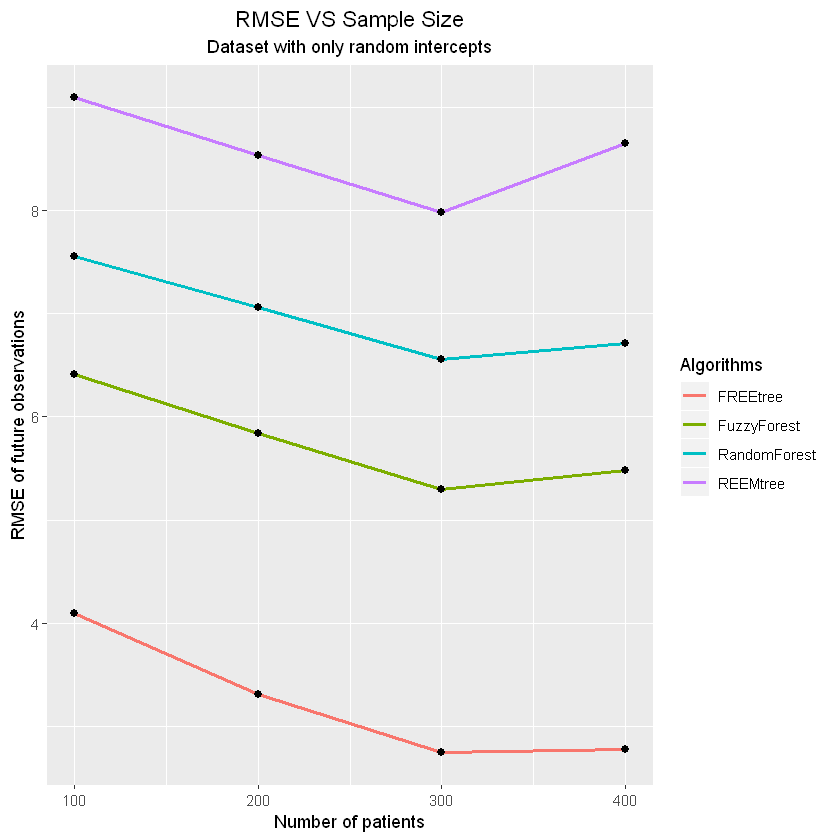

In [8]:
df_a0_long <- melt(df_a0, id="samplesize")  # convert to long format

g = ggplot(data=df_a0_long[complete.cases(df_a0_long),] , 
       aes(x=samplesize, y=value, colour=variable)) +  
geom_line(size=1)+geom_point(size=2,colour="black") +
labs(title="RMSE VS Sample Size",
     subtitle = "Dataset with only random intercepts",
     y="RMSE of future observations", x="Number of patients")+
theme(plot.title = element_text(hjust = 0.5),
      plot.subtitle = element_text(hjust = 0.5))+
labs(color='Algorithms') 


ggsave("a0.png")
g


# Feature selection